# 1. Know the data
# Importing Data

In [635]:
import numpy as np
import pandas as pd

#Importing tools for visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 
#Import evaluation metric librarie s
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report 
from sklearn.preprocessing import LabelEncoder
#Libraries used for data  prprocessing 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

#Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb #Xtreme Gradient Boosting
#librries used for ignore warnings 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Dataset Loading

In [638]:
iris=pd.read_csv(r"C:\Users\lakshita\Desktop\datasets\iris.csv")

# Dataset First View

In [641]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [643]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [644]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Dataset Rows & Columns count

In [648]:
# Correcting the use of iris.info()
print(iris.info())
print("Number of rows ", iris.shape[0])
print("Number of Columns ",iris.shape[1])
print(iris.head(150))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
Number of rows  150
Number of Columns  6
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...        

# Dataset Information

In [651]:
# Checking information about the dataset using info
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Duplicate Values

In [654]:
dup = iris.duplicated().sum()
print(f'Number of duplicate rows: {dup}')

Number of duplicate rows: 0


# Dropping duplicate rows

In [657]:
# Dropping duplicate rows
iris=iris.drop_duplicates()

# after dropping duplicates

In [660]:
# Checking the number of rows again to see if duplicates were dropped
print(f'Number of rows after dropping duplicates: {iris.shape[0]}')

Number of rows after dropping duplicates: 150


# Count plot for the species distribution

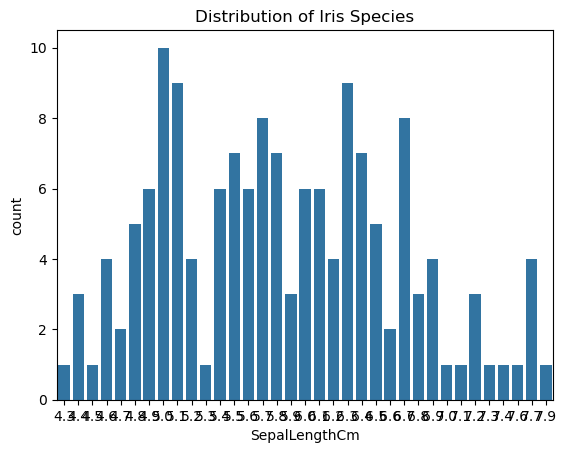

In [663]:
# Count plot for the species distribution
sns.countplot(data= iris, x ='SepalLengthCm')
plt.title('Distribution of Iris Species')
plt.show()

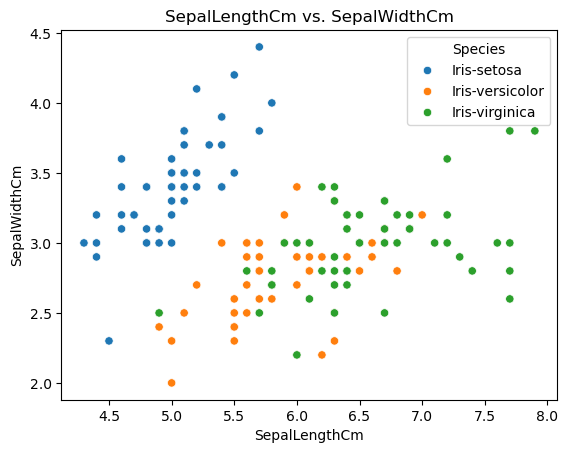

In [664]:
# Scatter plot for Sepal Length vs Sepal Width
sns.scatterplot(data= iris, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
plt.title('SepalLengthCm vs. SepalWidthCm')
plt.show()

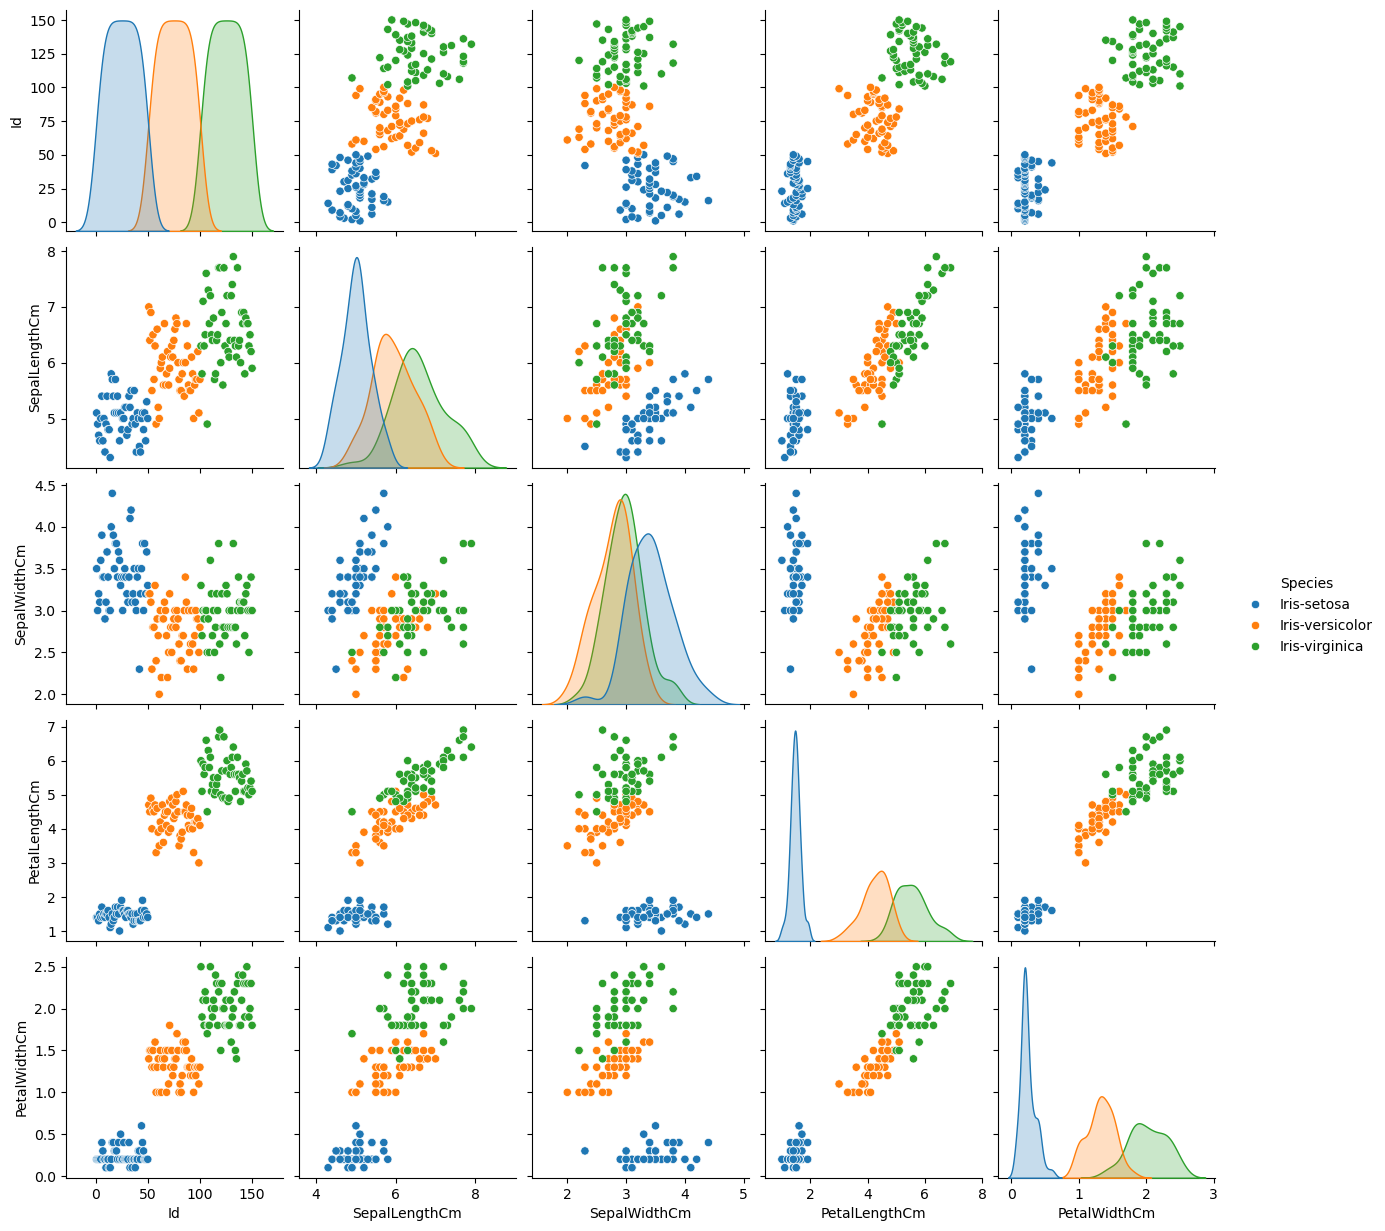

In [665]:
# Pair plot for visualizing relationships between all features
sns.pairplot(iris, hue='Species')
plt.show()

In [666]:
#checking number of rows and column of the dataset using shape
print("Number of rows: ",iris.shape[0])
print("Number of columns: ",iris.shape[1])

Number of rows:  150
Number of columns:  6


# Missing Values/Null Values

In [668]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# 2. Understanding The Variables

In [672]:
# Dataset Columns
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [673]:
iris.describe (include='all').round(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.00,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.50,5.84,3.05,3.76,1.20,NaN
std,43.45,0.83,0.43,1.76,0.76,NaN
min,1.00,4.30,2.00,1.00,0.10,NaN
25%,38.25,5.10,2.80,1.60,0.30,NaN
50%,75.50,5.80,3.00,4.35,1.30,NaN
75%,112.75,6.40,3.30,5.10,1.80,NaN


# Check Unique Values for each variable.

In [675]:
# Check Unique Values for each variable.
for i in iris.columns.tolist():
  print("No. of unique values in",i,"is",iris[i].nunique())

No. of unique values in Id is 150
No. of unique values in SepalLengthCm is 35
No. of unique values in SepalWidthCm is 23
No. of unique values in PetalLengthCm is 43
No. of unique values in PetalWidthCm is 22
No. of unique values in Species is 3


# 3. Data Wrangling

# Data Wrangling Code

In [678]:
# We don't need the 1st column so let's drop that
iris=iris.iloc[:,1:]

In [679]:
# New updated dataset
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

# Chart - 1 : Distribution of Numerical Variables

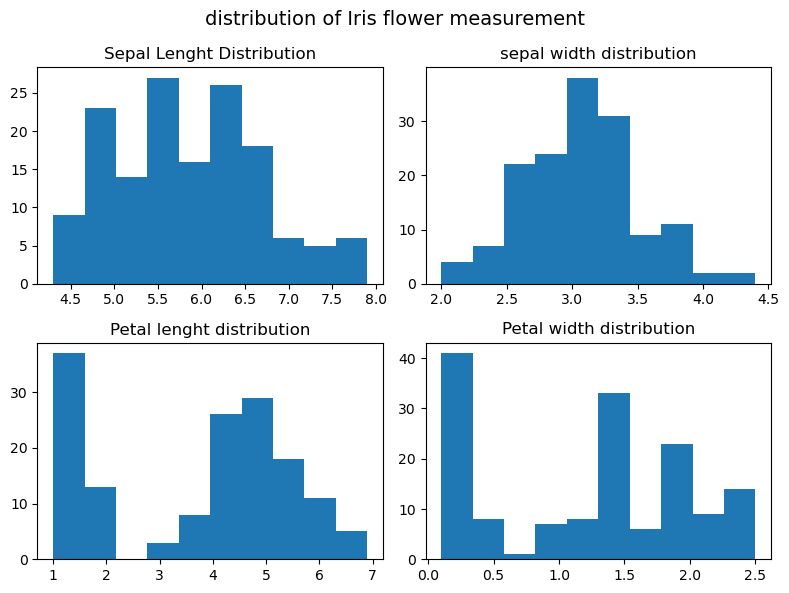

In [682]:
#chart 1 histogram visual code for distribution of numerical variables
#create a figure with subject
plt.figure(figsize=(8,6))
plt.suptitle('distribution of Iris flower measurement',fontsize=14)

#create a 2x2 grid of subplot
plt.subplot(2,2,1) #subject 1 (top-left)
plt.hist(iris['SepalLengthCm'])
plt.title('Sepal Lenght Distribution')

plt.subplot(2,2,2) #subject 2 (top-right)
plt.hist(iris['SepalWidthCm'])
plt.title('sepal width distribution')

plt.subplot(2,2,3) #subject 3 (bottom-left)
plt.hist(iris['PetalLengthCm'])
plt.title('Petal lenght distribution')

plt.subplot(2,2,4) #subject 4 (bottom-right)
plt.hist(iris['PetalWidthCm'])
plt.title('Petal width distribution')

#display the subjects
plt.tight_layout() #help in adjusting the layout
plt.show()

# Chart - 2 Scatter plot visualization code for Sepal Length vs Sepal Width.

In [684]:
# Define colors for each species and the corresponding species labels.
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

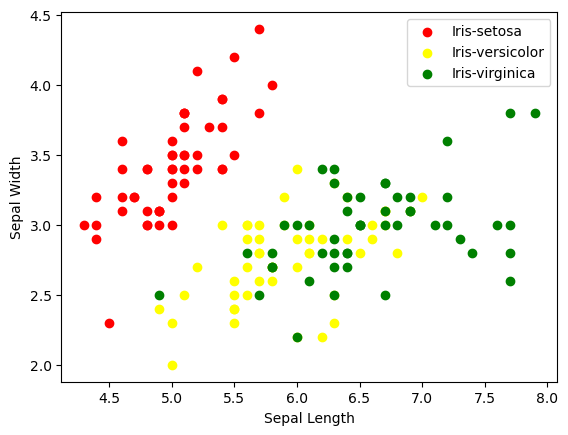

In [685]:
# Create a scatter plot for Sepal Length vs Sepal Width for each species
for i in range(3):
    # Select data for the current species
    x = iris[iris['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors
plt.legend()

# Display the scatter plot
plt.show()

# Chart - 3 Scatter plot visualization code for Petal Length vs Petal Width.

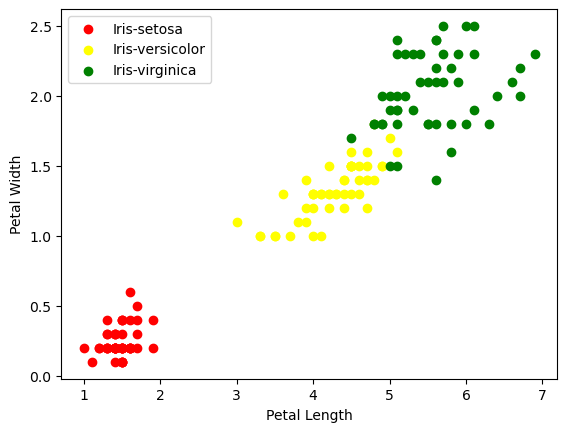

In [687]:
# Create a scatter plot for Petal Length vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = iris[iris['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

# Chart - 4 Scatter plot visualization code for Sepal Length vs Petal Length.

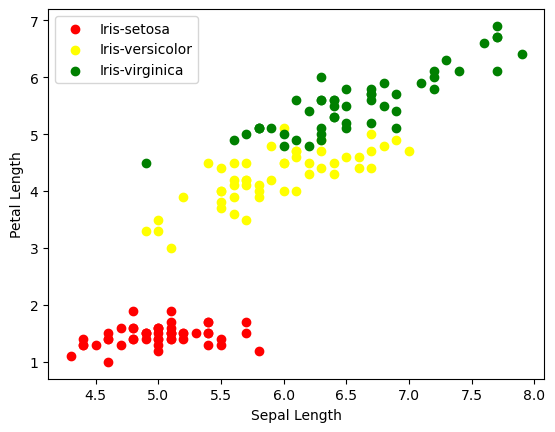

In [689]:
# Create a scatter plot for Sepal Length vs Petal Length for each species.
for i in range(3):
    # Select data for the current species.
    x = iris[iris['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

# Chart - 5 : Sepal Width vs Petal Width

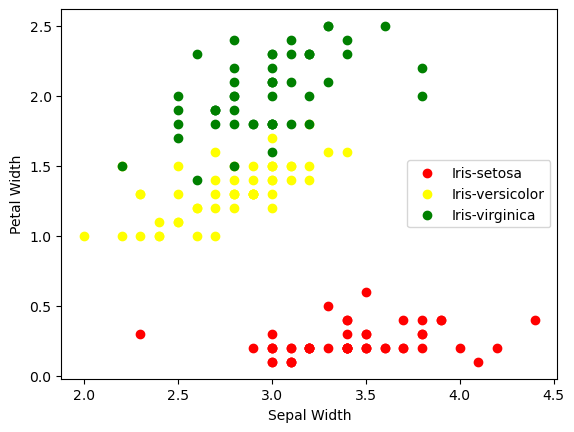

In [691]:
# Chart - 5 Scatter plot visualization code for Sepal Width vs Petal Width.
# Create a scatter plot for Sepal Width vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = iris[iris['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

# Chart - 6 : Correlation Heatmap

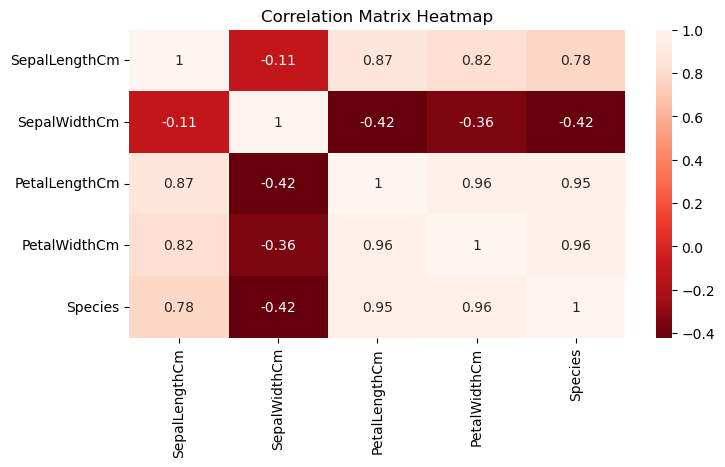

In [699]:
# Correlation Heatmap Visualization Code
corr_matrix = iris.corr()

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix Heatmap')

# Display Chart
plt.show()

# 5. Feature Engineering & Data Pre-processing

# Categorical Encoding

In [697]:
#encode the categorical columns
# create a labelEncoder object 
le=LabelEncoder()

#encode the "Species" column to convert the species names to numerical names to numerical labels
iris['Species']=le.fit_transform (iris['Species'])

#check the unique values in the Sepcies' column after encoding 
unique_species=iris['Species'].unique()

#display the unique encoded values
print("Encoded Species Value:")
print(unique_species) #'Iris-setosa'==0 ,'Iris-versicolor'==1  ,'Iris-virginica'==2

Encoded Species Value:
[0 1 2]


# Data Scaling

In [702]:
# Defining the X and y
x=iris.drop(columns=['Species'], axis=1)
y=iris['Species']

# Data splitting

In [705]:
# splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [707]:
# Checking the train distribution of dependent variable
y_train.value_counts()

Species
2    38
0    35
1    32
Name: count, dtype: int64

# 6. ML Model Implementation

In [710]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [712]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])


# ML Model - 1 : Logistic regression

In [715]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)
# Model is trained (fit) and predicted in the evaluate model

## 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


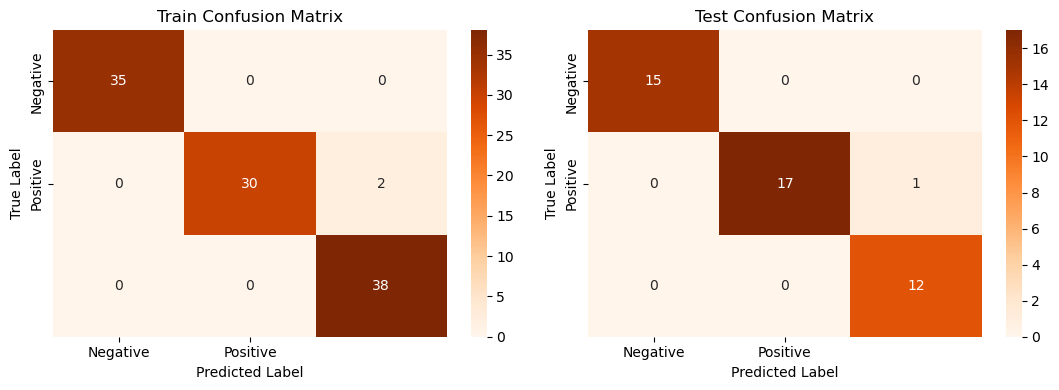


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    1        | 0.9375   |   0.967742 |  32        |
| 2            |    0.95     | 1        |   0.974359 |  38        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.983333 | 0.979167 |   0.9807   | 105        |
| weighted avg |    0.981905 | 0.980952 |   0.980889 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.944444 |   0.971429 | 18        |
| 2            |    0.923077 | 1        |   0.96     | 12        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [718]:
# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [719]:
# Updated Evaluation metric Score Chart
score['logistic_regression'] = lr_score
score

,logistic_regression
Precision Train,0.981905
Precision Test,0.979487
Recall Train,0.980952
Recall Test,0.977778
Accuracy Train,0.980952
Accuracy Test,0.977778
F1 macro Train,0.980889
F1 macro Test,0.977905


# 2. Cross- Validation & Hyperparameter Tuning

In [723]:
# ML Model - 1 Implementation with hyperparameter optimization techniques
#(i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(x_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 10, 'penalty': 'l2', 'solver': 'saga'}


In [724]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Confusion Matrix:


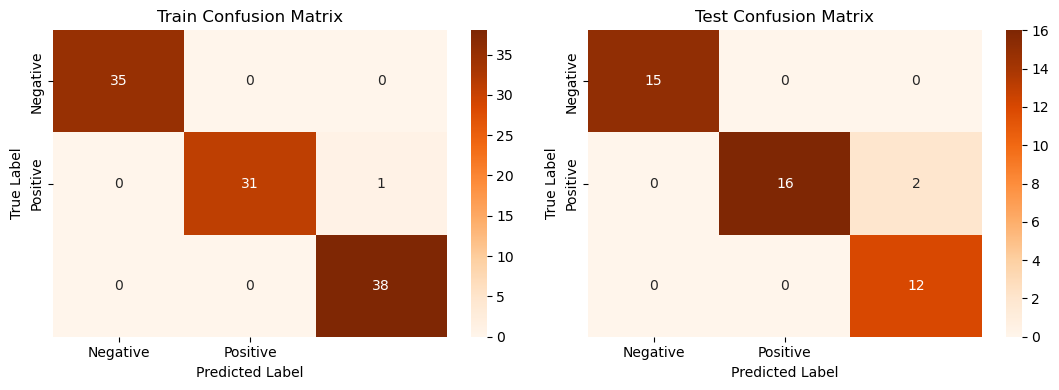


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    1        | 0.96875  |   0.984127 |  32        |
| 2            |    0.974359 | 1        |   0.987013 |  38        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.991453 | 0.989583 |   0.99038  | 105        |
| weighted avg |    0.99072  | 0.990476 |   0.990462 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.888889 |   0.941176 | 18        |
| 2            |    0.857143 | 1        |   0.923077 | 12        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [725]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)

In [726]:
score['logistic_regression tuned'] = lr_score2

In [727]:
# Updated Evaluation metric Score Chart
score

,logistic_regression,logistic_regression tuned
Precision Train,0.981905,0.990720
Precision Test,0.979487,0.961905
Recall Train,0.980952,0.990476
Recall Test,0.977778,0.955556
Accuracy Train,0.980952,0.990476
Accuracy Test,0.977778,0.955556
F1 macro Train,0.980889,0.990462
F1 macro Test,0.977905,0.955958


# ML Model - 2 : Decision Tree

In [729]:
# ML Model - 2 Implementation
dt_model = DecisionTreeClassifier(random_state=20)
# Model is trained (fit) and predicted in the evaluate model

# 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


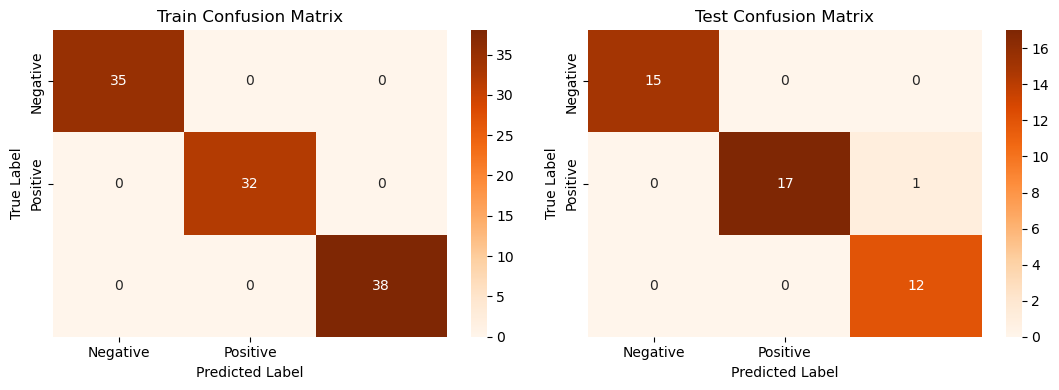


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        32 |
| 2            |           1 |        1 |          1 |        38 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.944444 |   0.971429 | 18        |
| 2            |    0.923077 | 1        |   0.96     | 12        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.977778 |
| m

In [731]:
# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

In [732]:
# Updated Evaluation metric Score Chart
score['decision_tree'] = dt_score
score

,logistic_regression,logistic_regression tuned,decision_tree
Precision Train,0.981905,0.990720,1.000000
Precision Test,0.979487,0.961905,0.979487
Recall Train,0.980952,0.990476,1.000000
Recall Test,0.977778,0.955556,0.977778
Accuracy Train,0.980952,0.990476,1.000000
Accuracy Test,0.977778,0.955556,0.977778
F1 macro Train,0.980889,0.990462,1.000000
F1 macro Test,0.977905,0.955958,0.977905


# 2. Cross- Validation & Hyperparameter Tuning

In [734]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("best_hyperparameters: ", best_params)

best_hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [735]:
# Train a new model with the best hyperparameters
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Confusion Matrix:


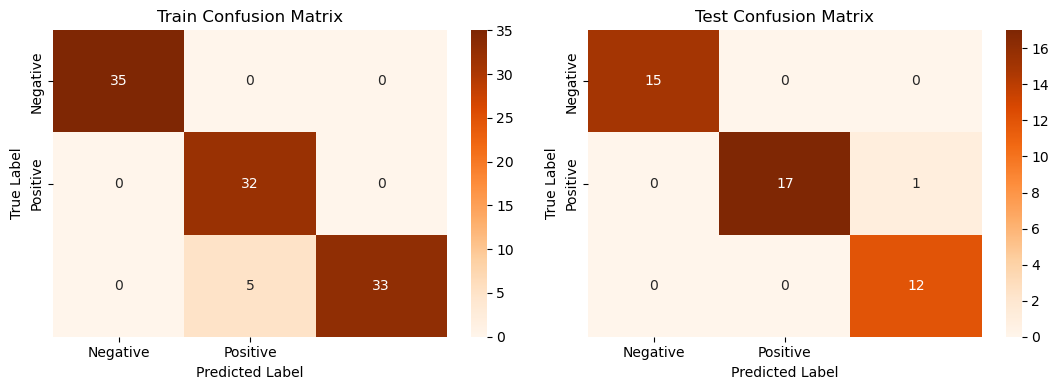


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.864865 | 1        |   0.927536 |  32        |
| 2            |    1        | 0.868421 |   0.929577 |  38        |
| accuracy     |    0.952381 | 0.952381 |   0.952381 |   0.952381 |
| macro avg    |    0.954955 | 0.95614  |   0.952371 | 105        |
| weighted avg |    0.958816 | 0.952381 |   0.95243  | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.944444 |   0.971429 | 18        |
| 2            |    0.923077 | 1        |   0.96     | 12        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [736]:
# Visualizing evaluation Metric Score chart
dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)

In [737]:
score['decision_tree_tuned'] = dt2_score

In [738]:
# Updated Evaluation metric Score Chart
score

,logistic_regression,logistic_regression tuned,decision_tree,decision_tree_tuned
Precision Train,0.981905,0.990720,1.000000,0.958816
Precision Test,0.979487,0.961905,0.979487,0.979487
Recall Train,0.980952,0.990476,1.000000,0.952381
Recall Test,0.977778,0.955556,0.977778,0.977778
Accuracy Train,0.980952,0.990476,1.000000,0.952381
Accuracy Test,0.977778,0.955556,0.977778,0.977778
F1 macro Train,0.980889,0.990462,1.000000,0.952430
F1 macro Test,0.977905,0.955958,0.977905,0.977905


# ML Model - 3 : Random Forest

In [740]:
# ML Model - 3 Implementation
rf_model = RandomForestClassifier(random_state=0)
# Model is trained (fit) and predicted in the evaluate model

# 1. Explain the ML Model used and it's performance using Evaluation Metric Score Chart.


Confusion Matrix:


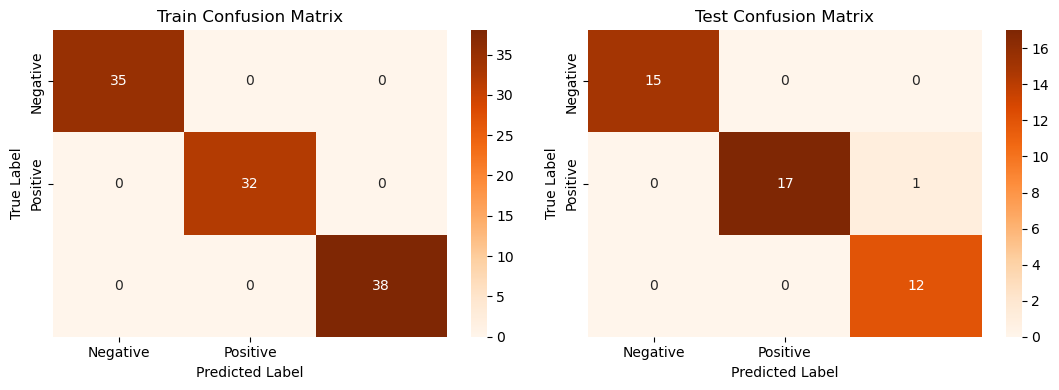


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        32 |
| 2            |           1 |        1 |          1 |        38 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.944444 |   0.971429 | 18        |
| 2            |    0.923077 | 1        |   0.96     | 12        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.977778 |
| m

In [742]:
#visualization evaluation metric score chart
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [743]:
# Updated Evaluation metric Score Chart
score['random_forest'] = rf_score
score

,logistic_regression,logistic_regression tuned,decision_tree,decision_tree_tuned,random_forest
Precision Train,0.981905,0.990720,1.000000,0.958816,1.000000
Precision Test,0.979487,0.961905,0.979487,0.979487,0.979487
Recall Train,0.980952,0.990476,1.000000,0.952381,1.000000
Recall Test,0.977778,0.955556,0.977778,0.977778,0.977778
Accuracy Train,0.980952,0.990476,1.000000,0.952381,1.000000
Accuracy Test,0.977778,0.955556,0.977778,0.977778,0.977778
F1 macro Train,0.980889,0.990462,1.000000,0.952430,1.000000
F1 macro Test,0.977905,0.955958,0.977905,0.977905,0.977905


# 2. Cross- Validation & Hyperparameter Tuning

In [745]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("best_hyperparameters: ", best_params)

best_hyperparameters:  {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 13}


In [746]:
# Initialize model with best parameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Confusion Matrix:


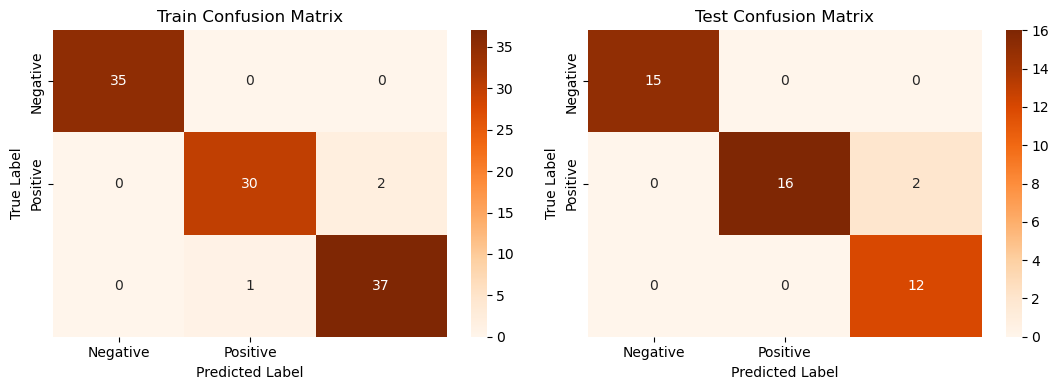


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.967742 | 0.9375   |   0.952381 |  32        |
| 2            |    0.948718 | 0.973684 |   0.961039 |  38        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.972153 | 0.970395 |   0.97114  | 105        |
| weighted avg |    0.97161  | 0.971429 |   0.971387 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.888889 |   0.941176 | 18        |
| 2            |    0.857143 | 1        |   0.923077 | 12        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [747]:
# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)

In [748]:
score['random_forest_tuned'] = rf2_score
#Updated Evaluation metric Score Chart
score


,logistic_regression,logistic_regression tuned,decision_tree,decision_tree_tuned,random_forest,random_forest_tuned
Precision Train,0.981905,0.990720,1.000000,0.958816,1.000000,0.971610
Precision Test,0.979487,0.961905,0.979487,0.979487,0.979487,0.961905
Recall Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429
Recall Test,0.977778,0.955556,0.977778,0.977778,0.977778,0.955556
Accuracy Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429
Accuracy Test,0.977778,0.955556,0.977778,0.977778,0.977778,0.955556
F1 macro Train,0.980889,0.990462,1.000000,0.952430,1.000000,0.971387
F1 macro Test,0.977905,0.955958,0.977905,0.977905,0.977905,0.955958


# ML Model - 4 : SVM (Support Vector Machine)

In [750]:
# ML Model - 4 Implementation
svm_model = SVC(kernel='linear', random_state=0, probability=True)
# Model is trained (fit) and predicted in the evaluate model

# 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


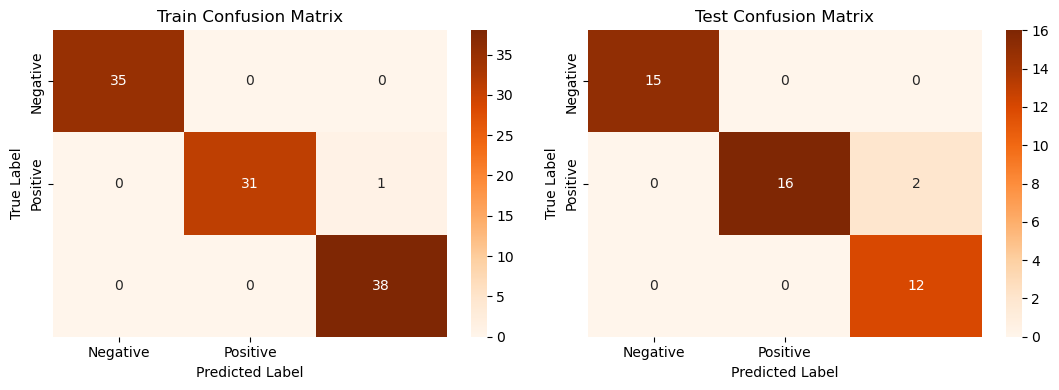


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    1        | 0.96875  |   0.984127 |  32        |
| 2            |    0.974359 | 1        |   0.987013 |  38        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.991453 | 0.989583 |   0.99038  | 105        |
| weighted avg |    0.99072  | 0.990476 |   0.990462 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.888889 |   0.941176 | 18        |
| 2            |    0.857143 | 1        |   0.923077 | 12        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [752]:
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)

In [753]:
#Updated Evaluation metric Score Chart
score['s_v_m'] = svm_score
score

,logistic_regression,logistic_regression tuned,decision_tree,decision_tree_tuned,random_forest,random_forest_tuned,s_v_m
Precision Train,0.981905,0.990720,1.000000,0.958816,1.000000,0.971610,0.990720
Precision Test,0.979487,0.961905,0.979487,0.979487,0.979487,0.961905,0.961905
Recall Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429,0.990476
Recall Test,0.977778,0.955556,0.977778,0.977778,0.977778,0.955556,0.955556
Accuracy Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429,0.990476
Accuracy Test,0.977778,0.955556,0.977778,0.977778,0.977778,0.955556,0.955556
F1 macro Train,0.980889,0.990462,1.000000,0.952430,1.000000,0.971387,0.990462
F1 macro Test,0.977905,0.955958,0.977905,0.977905,0.977905,0.955958,0.955958


# 2. Cross- Validation & Hyperparameter Tuning

In [755]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the model
svm = SVC(random_state=0, probability=True)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with kfold cross-validation
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("best_hyperparameters: ", best_params)

best_hyperparameters:  {'kernel': 'linear', 'degree': 5, 'C': 1.5000000000000002}


In [756]:
# Initialize model with best parameters
svm_model2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)


Confusion Matrix:


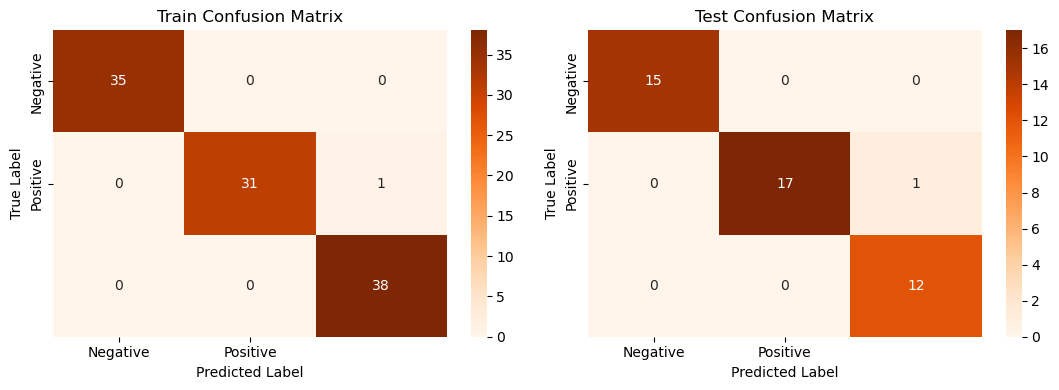


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    1        | 0.96875  |   0.984127 |  32        |
| 2            |    0.974359 | 1        |   0.987013 |  38        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.991453 | 0.989583 |   0.99038  | 105        |
| weighted avg |    0.99072  | 0.990476 |   0.990462 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.944444 |   0.971429 | 18        |
| 2            |    0.923077 | 1        |   0.96     | 12        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [757]:
# Visualizing evaluation Metric Score chart
svm2_score = evaluate_model(svm_model2, x_train, x_test, y_train, y_test)

In [758]:
score['s_v_m_tuned'] = svm2_score
# Updated Evaluation metric Score Chart
score

,logistic_regression,logistic_regression tuned,decision_tree,decision_tree_tuned,random_forest,random_forest_tuned,s_v_m,s_v_m_tuned
Precision Train,0.981905,0.990720,1.000000,0.958816,1.000000,0.971610,0.990720,0.990720
Precision Test,0.979487,0.961905,0.979487,0.979487,0.979487,0.961905,0.961905,0.979487
Recall Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429,0.990476,0.990476
Recall Test,0.977778,0.955556,0.977778,0.977778,0.977778,0.955556,0.955556,0.977778
Accuracy Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429,0.990476,0.990476
Accuracy Test,0.977778,0.955556,0.977778,0.977778,0.977778,0.955556,0.955556,0.977778
F1 macro Train,0.980889,0.990462,1.000000,0.952430,1.000000,0.971387,0.990462,0.990462
F1 macro Test,0.977905,0.955958,0.977905,0.977905,0.977905,0.955958,0.955958,0.977905


# ML Model - 5 : Xtreme Gradient Boosting

In [760]:
# ML Model - 5 Implementation
xgb_model = xgb.XGBClassifier()
# Model is trained (fit) and predicted in the evaluate model

# 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


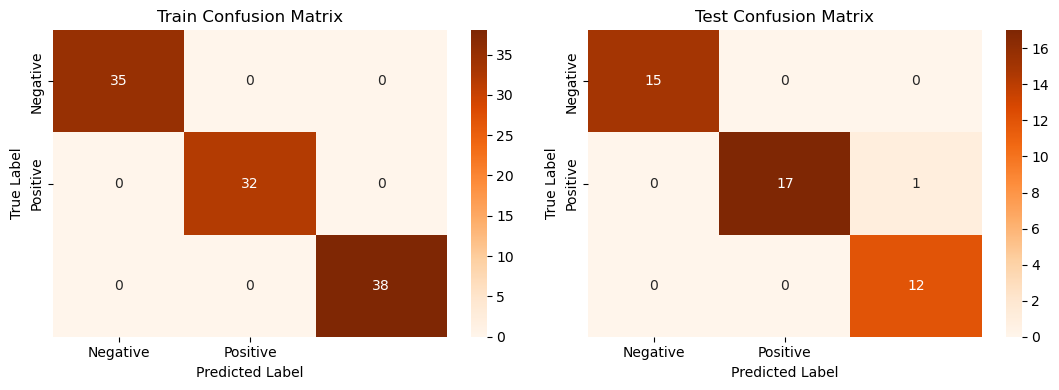


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        32 |
| 2            |           1 |        1 |          1 |        38 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.944444 |   0.971429 | 18        |
| 2            |    0.923077 | 1        |   0.96     | 12        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.977778 |
| m

In [762]:
#Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model, x_train, x_test, y_train, y_test)

In [763]:
# Updated Evaluation metric Score Chart
score['x_g_b'] = xgb_score
score

,logistic_regression,logistic_regression tuned,decision_tree,decision_tree_tuned,random_forest,random_forest_tuned,s_v_m,s_v_m_tuned,x_g_b
Precision Train,0.981905,0.990720,1.000000,0.958816,1.000000,0.971610,0.990720,0.990720,1.000000
Precision Test,0.979487,0.961905,0.979487,0.979487,0.979487,0.961905,0.961905,0.979487,0.979487
Recall Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429,0.990476,0.990476,1.000000
Recall Test,0.977778,0.955556,0.977778,0.977778,0.977778,0.955556,0.955556,0.977778,0.977778
Accuracy Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429,0.990476,0.990476,1.000000
Accuracy Test,0.977778,0.955556,0.977778,0.977778,0.977778,0.955556,0.955556,0.977778,0.977778
F1 macro Train,0.980889,0.990462,1.000000,0.952430,1.000000,0.971387,0.990462,0.990462,1.000000
F1 macro Test,0.977905,0.955958,0.977905,0.977905,0.977905,0.955958,0.955958,0.977905,0.977905


# 2. Cross- Validation & Hyperparameter Tuning

In [765]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb2 = xgb.XGBClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2, param_grid, n_iter=10, cv=rskf)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("best_hyperparameters: ", best_params)

best_hyperparameters:  {'n_estimators': 110, 'max_depth': 13, 'learning_rate': 0.01}


In [766]:
# Initialize model with best parameters
xgb_model2 = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)


Confusion Matrix:


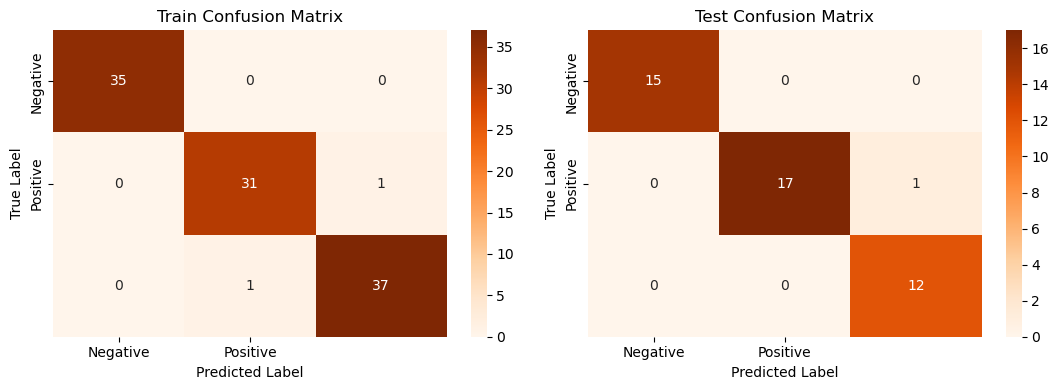


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.96875  | 0.96875  |   0.96875  |  32        |
| 2            |    0.973684 | 0.973684 |   0.973684 |  38        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.980811 | 0.980811 |   0.980811 | 105        |
| weighted avg |    0.980952 | 0.980952 |   0.980952 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.944444 |   0.971429 | 18        |
| 2            |    0.923077 | 1        |   0.96     | 12        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [767]:
# Visualizing evaluation Metric Score chart
xgb2_score = evaluate_model(xgb_model2, x_train, x_test, y_train, y_test)

In [768]:
score['x_g_b_tuned'] = xgb2_score
# Updated Evaluation metric Score Chart
score

,logistic_regression,logistic_regression tuned,decision_tree,decision_tree_tuned,random_forest,random_forest_tuned,s_v_m,s_v_m_tuned,x_g_b,x_g_b_tuned
Precision Train,0.981905,0.990720,1.000000,0.958816,1.000000,0.971610,0.990720,0.990720,1.000000,0.980952
Precision Test,0.979487,0.961905,0.979487,0.979487,0.979487,0.961905,0.961905,0.979487,0.979487,0.979487
Recall Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429,0.990476,0.990476,1.000000,0.980952
Recall Test,0.977778,0.955556,0.977778,0.977778,0.977778,0.955556,0.955556,0.977778,0.977778,0.977778
Accuracy Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429,0.990476,0.990476,1.000000,0.980952
Accuracy Test,0.977778,0.955556,0.977778,0.977778,0.977778,0.955556,0.955556,0.977778,0.977778,0.977778
F1 macro Train,0.980889,0.990462,1.000000,0.952430,1.000000,0.971387,0.990462,0.990462,1.000000,0.980952
F1 macro Test,0.977905,0.955958,0.977905,0.977905,0.977905,0.955958,0.955958,0.977905,0.977905,0.977905


# ML Model - 6 : Naive Bayes

In [770]:
# ML Model - 6 Implementation
nb_model = GaussianNB()

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


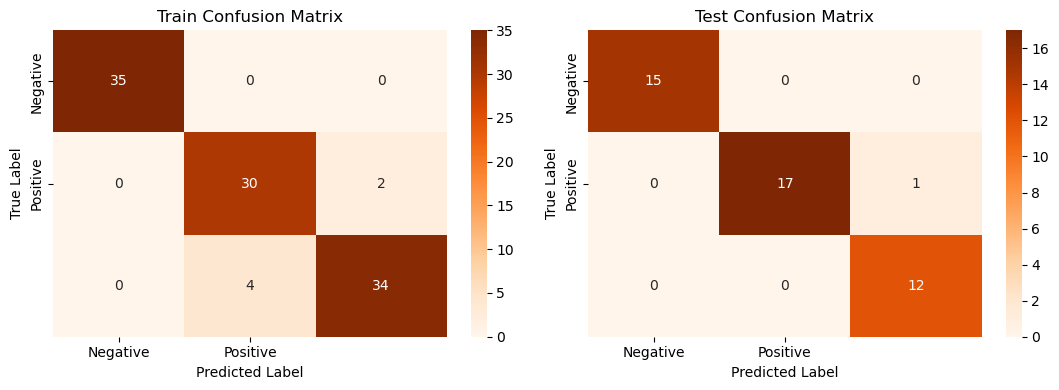


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.882353 | 0.9375   |   0.909091 |  32        |
| 2            |    0.944444 | 0.894737 |   0.918919 |  38        |
| accuracy     |    0.942857 | 0.942857 |   0.942857 |   0.942857 |
| macro avg    |    0.942266 | 0.944079 |   0.94267  | 105        |
| weighted avg |    0.94404  | 0.942857 |   0.942951 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.944444 |   0.971429 | 18        |
| 2            |    0.923077 | 1        |   0.96     | 12        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [772]:
# Visualizing evaluation Metric Score chart
nb_score = evaluate_model(nb_model, x_train, x_test, y_train, y_test)

In [774]:
# Updated Evaluation metric Score Chart
score['naive_bayes'] = nb_score
score

,logistic_regression,logistic_regression tuned,decision_tree,decision_tree_tuned,random_forest,random_forest_tuned,s_v_m,s_v_m_tuned,x_g_b,x_g_b_tuned,naive_bayes
Precision Train,0.981905,0.990720,1.000000,0.958816,1.000000,0.971610,0.990720,0.990720,1.000000,0.980952,0.944040
Precision Test,0.979487,0.961905,0.979487,0.979487,0.979487,0.961905,0.961905,0.979487,0.979487,0.979487,0.979487
Recall Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429,0.990476,0.990476,1.000000,0.980952,0.942857
Recall Test,0.977778,0.955556,0.977778,0.977778,0.977778,0.955556,0.955556,0.977778,0.977778,0.977778,0.977778
Accuracy Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429,0.990476,0.990476,1.000000,0.980952,0.942857
Accuracy Test,0.977778,0.955556,0.977778,0.977778,0.977778,0.955556,0.955556,0.977778,0.977778,0.977778,0.977778
F1 macro Train,0.980889,0.990462,1.000000,0.952430,1.000000,0.971387,0.990462,0.990462,1.000000,0.980952,0.942951
F1 macro Test,0.977905,0.955958,0.977905,0.977905,0.977905,0.955958,0.955958,0.977905,0.977905,0.977905,0.977905


# 2. Cross- Validation & Hyperparameter Tuning

In [776]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(x_train, y_train)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("best_hyperparameters: ", best_params)

best_hyperparameters:  {'var_smoothing': 0.01873817422860384}


In [777]:
# Initiate model with best parameters
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])


Confusion Matrix:


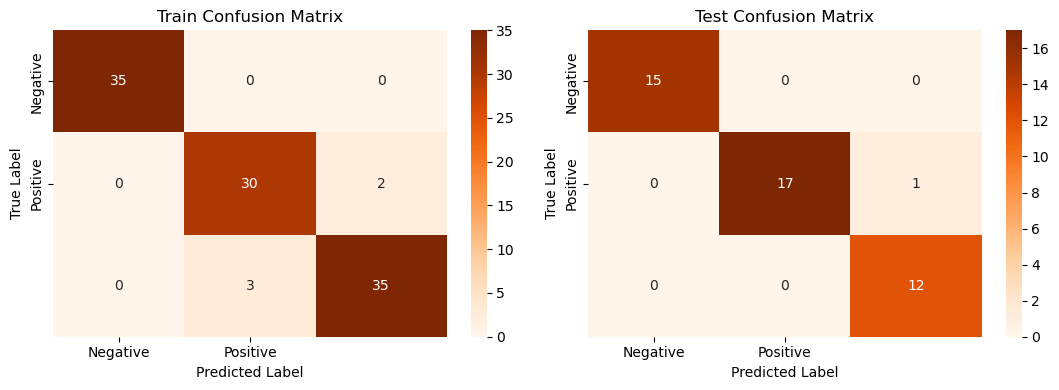


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.909091 | 0.9375   |   0.923077 |  32        |
| 2            |    0.945946 | 0.921053 |   0.933333 |  38        |
| accuracy     |    0.952381 | 0.952381 |   0.952381 |   0.952381 |
| macro avg    |    0.951679 | 0.952851 |   0.952137 | 105        |
| weighted avg |    0.952732 | 0.952381 |   0.95243  | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.944444 |   0.971429 | 18        |
| 2            |    0.923077 | 1        |   0.96     | 12        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [782]:
# Visualizing evaluation Metric Score chart
nb2_score = evaluate_model(nb_model2, x_train, x_test, y_train, y_test)

In [783]:
score['naive_bayes_tuned']= nb2_score
# Updated Evaluation metric Score Chart
score

,logistic_regression,logistic_regression tuned,decision_tree,decision_tree_tuned,random_forest,random_forest_tuned,s_v_m,s_v_m_tuned,x_g_b,x_g_b_tuned,naive_bayes,naive_bayes_tuned
Precision Train,0.981905,0.990720,1.000000,0.958816,1.000000,0.971610,0.990720,0.990720,1.000000,0.980952,0.944040,0.952732
Precision Test,0.979487,0.961905,0.979487,0.979487,0.979487,0.961905,0.961905,0.979487,0.979487,0.979487,0.979487,0.979487
Recall Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429,0.990476,0.990476,1.000000,0.980952,0.942857,0.952381
Recall Test,0.977778,0.955556,0.977778,0.977778,0.977778,0.955556,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778
Accuracy Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429,0.990476,0.990476,1.000000,0.980952,0.942857,0.952381
Accuracy Test,0.977778,0.955556,0.977778,0.977778,0.977778,0.955556,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778
F1 macro Train,0.980889,0.990462,1.000000,0.952430,1.000000,0.971387,0.990462,0.990462,1.000000,0.980952,0.942951,0.952430
F1 macro Test,0.977905,0.955958,0.977905,0.977905,0.977905,0.955958,0.955958,0.977905,0.977905,0.977905,0.977905,0.977905


# ML Model - 7 : Neural Network

In [785]:
# ML Model - 7 Implementation
nn_model = MLPClassifier(random_state=0)
# Model is trained (fit) and predicted in the evaluate model

# 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


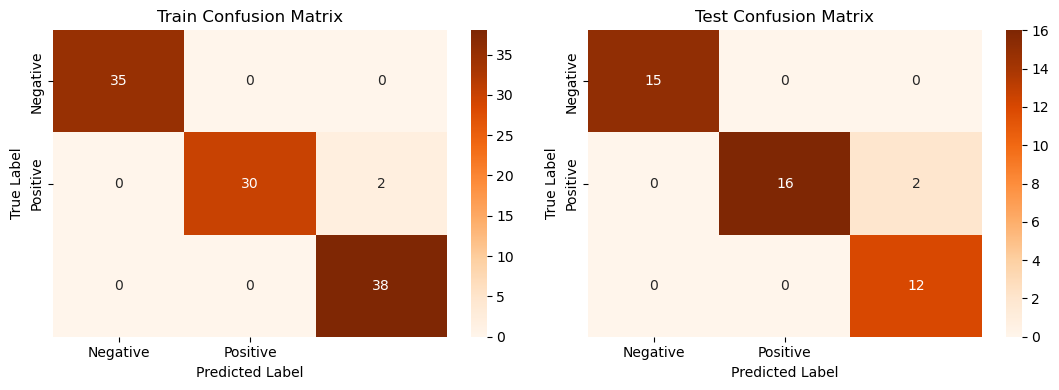


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    1        | 0.9375   |   0.967742 |  32        |
| 2            |    0.95     | 1        |   0.974359 |  38        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.983333 | 0.979167 |   0.9807   | 105        |
| weighted avg |    0.981905 | 0.980952 |   0.980889 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.888889 |   0.941176 | 18        |
| 2            |    0.857143 | 1        |   0.923077 | 12        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [789]:
# Visualizing evaluation Metric Score chart
neural_score = evaluate_model(nn_model, x_train, x_test, y_train, y_test)

In [790]:
# Updated Evaluation metric Score Chart
score['neural_network'] = neural_score
score

,logistic_regression,logistic_regression tuned,decision_tree,decision_tree_tuned,random_forest,random_forest_tuned,s_v_m,s_v_m_tuned,x_g_b,x_g_b_tuned,naive_bayes,naive_bayes_tuned,neural_network
Precision Train,0.981905,0.990720,1.000000,0.958816,1.000000,0.971610,0.990720,0.990720,1.000000,0.980952,0.944040,0.952732,0.981905
Precision Test,0.979487,0.961905,0.979487,0.979487,0.979487,0.961905,0.961905,0.979487,0.979487,0.979487,0.979487,0.979487,0.961905
Recall Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429,0.990476,0.990476,1.000000,0.980952,0.942857,0.952381,0.980952
Recall Test,0.977778,0.955556,0.977778,0.977778,0.977778,0.955556,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778,0.955556
Accuracy Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429,0.990476,0.990476,1.000000,0.980952,0.942857,0.952381,0.980952
Accuracy Test,0.977778,0.955556,0.977778,0.977778,0.977778,0.955556,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778,0.955556
F1 macro Train,0.980889,0.990462,1.000000,0.952430,1.000000,0.971387,0.990462,0.990462,1.000000,0.980952,0.942951,0.952430,0.980889
F1 macro Test,0.977905,0.955958,0.977905,0.977905,0.977905,0.955958,0.955958,0.977905,0.977905,0.977905,0.977905,0.977905,0.955958


# 2. Cross- Validation & Hyperparameter Tuning

In [792]:
# ML Model - 7 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}

# Initialize the model
neural = MLPClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("best_hyperparameters: ", best_params)

best_hyperparameters:  {'hidden_layer_sizes': 60, 'alpha': 0.009899999999999999}


In [793]:
# Initiate model with best parameters
nn_model2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        alpha = best_params['alpha'],
                        random_state = 0)


Confusion Matrix:


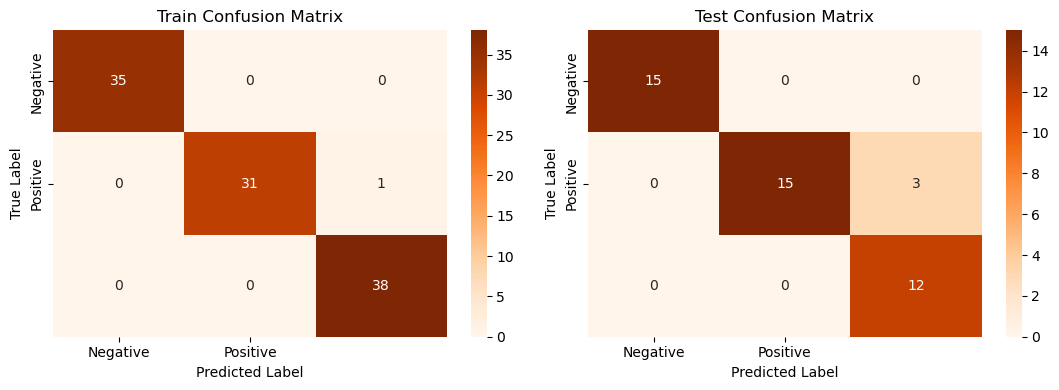


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    1        | 0.96875  |   0.984127 |  32        |
| 2            |    0.974359 | 1        |   0.987013 |  38        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.991453 | 0.989583 |   0.99038  | 105        |
| weighted avg |    0.99072  | 0.990476 |   0.990462 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.833333 |   0.909091 | 18        |
| 2            |    0.8      | 1        |   0.888889 | 12        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.9333

In [794]:
# Visualizing evaluation Metric Score chart
neural2_score = evaluate_model(nn_model2, x_train, x_test, y_train, y_test)

In [795]:
score['neural_network_tuned']= neural2_score
# Updated Evaluation metric Score Chart
score

,logistic_regression,logistic_regression tuned,decision_tree,decision_tree_tuned,random_forest,random_forest_tuned,s_v_m,s_v_m_tuned,x_g_b,x_g_b_tuned,naive_bayes,naive_bayes_tuned,neural_network,neural_network_tuned
Precision Train,0.981905,0.990720,1.000000,0.958816,1.000000,0.971610,0.990720,0.990720,1.000000,0.980952,0.944040,0.952732,0.981905,0.990720
Precision Test,0.979487,0.961905,0.979487,0.979487,0.979487,0.961905,0.961905,0.979487,0.979487,0.979487,0.979487,0.979487,0.961905,0.946667
Recall Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429,0.990476,0.990476,1.000000,0.980952,0.942857,0.952381,0.980952,0.990476
Recall Test,0.977778,0.955556,0.977778,0.977778,0.977778,0.955556,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778,0.955556,0.933333
Accuracy Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429,0.990476,0.990476,1.000000,0.980952,0.942857,0.952381,0.980952,0.990476
Accuracy Test,0.977778,0.955556,0.977778,0.977778,0.977778,0.955556,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778,0.955556,0.933333
F1 macro Train,0.980889,0.990462,1.000000,0.952430,1.000000,0.971387,0.990462,0.990462,1.000000,0.980952,0.942951,0.952430,0.980889,0.990462
F1 macro Test,0.977905,0.955958,0.977905,0.977905,0.977905,0.955958,0.955958,0.977905,0.977905,0.977905,0.977905,0.977905,0.955958,0.934007


# Markdown

In [797]:
print(score.to_markdown())

|                 |   logistic_regression |   logistic_regression tuned |   decision_tree |   decision_tree_tuned |   random_forest |   random_forest_tuned |    s_v_m |   s_v_m_tuned |    x_g_b |   x_g_b_tuned |   naive_bayes |   naive_bayes_tuned |   neural_network |   neural_network_tuned |
|:----------------|----------------------:|----------------------------:|----------------:|----------------------:|----------------:|----------------------:|---------:|--------------:|---------:|--------------:|--------------:|--------------------:|-----------------:|-----------------------:|
| Precision Train |              0.981905 |                    0.99072  |        1        |              0.958816 |        1        |              0.97161  | 0.99072  |      0.99072  | 1        |      0.980952 |      0.94404  |            0.952732 |         0.981905 |               0.99072  |
| Precision Test  |              0.979487 |                    0.961905 |        0.979487 |              0.979487 |   

# *Selection of best model*

In [799]:
# Removing the overfitted models which have precision, recall, f1 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.98].index  # creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['Precision Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

abc = score_t.drop(remove_models)                     # creating a new dataframe with required models
abc

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
decision_tree_tuned,0.958816,0.979487,0.952381,0.977778,0.952381,0.977778,0.952430,0.977905
random_forest_tuned,0.971610,0.961905,0.971429,0.955556,0.971429,0.955556,0.971387,0.955958
naive_bayes,0.944040,0.979487,0.942857,0.977778,0.942857,0.977778,0.942951,0.977905
naive_bayes_tuned,0.952732,0.979487,0.952381,0.977778,0.952381,0.977778,0.952430,0.977905


In [800]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [801]:
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']
best_models = select_best_model(abc, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {abc[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: decision_tree_tuned - 0.9795
Recall: decision_tree_tuned - 0.9778
Accuracy: decision_tree_tuned - 0.9778
F1 macro: decision_tree_tuned - 0.9779


In [802]:
# Take recall as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model   |   Recall Train |   Recall Test |
|:-----------------------|---------------:|--------------:|
| decision_tree_tuned    |       0.952381 |      0.977778 |
| random_forest_tuned    |       0.971429 |      0.955556 |
| naive_bayes            |       0.942857 |      0.977778 |
| naive_bayes_tuned      |       0.952381 |      0.977778 |


# Explain the model which have used for the prediction

In [804]:
# Define a list of category labels for reference.
Category_RF = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']

In [805]:
# In this example, it's a data point with Sepal Length, Sepal Width, Petal Length, and Petal Width.
x_rf = np.array([[5.1, 3.5, 1.4, 0.2]])

# Use the tuned random forest model (rf_model2) to make a prediction.
x_rf_prediction = rf_model2.predict(x_rf)
x_rf_prediction[0]

# Display the predicted category label.
print(Category_RF[int(x_rf_prediction[0])])

Iris-Setosa


#  **.......T H A N K      Y O U ......**

In [857]:
print("......  T H A N K         Y O U ..........")

......  T H A N K         Y O U ..........
